In [1196]:

# TimeSeries - Block Maxima
from pydoc import describe
from unicodedata import decimal
from pyextremes import EVA,get_extremes , __version__
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from scipy.signal import find_peaks
import pdb

In [1197]:
# np.seterr(divide='ignore', invalid='ignore')


In [1198]:
def loadCsv(path):
    loader = pd.read_csv(path, index_col=0,delimiter=';', parse_dates=True).squeeze()
    
    return loader

In [1199]:
dataOriginal = loadCsv('dei2.csv')
# print(data.head())
# print(data.describe())
print(dataOriginal.info())
# data.dropna(inplace=True)
print(dataOriginal.info())
print(dataOriginal.head())

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 1948 to T124IT10421013
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Address                                   318 non-null    object 
 1   Location Partner                          317 non-null    object 
 2   Type of installation (Public/ Private)    318 non-null    object 
 3   City                                      318 non-null    object 
 4   Manufacturer                              318 non-null    object 
 5   EVSE Sockets                              318 non-null    int64  
 6   max P per EVSE (kW)                       318 non-null    int64  
 7   Unnamed: 8                                318 non-null    int64  
 8   Number of Charging Sessions               318 non-null    int64  
 9   Energy consumed (kWh)                     318 non-null    float64
 10  Charging Time (h)            

In [1200]:
print(dataOriginal)


                                                          Address  \
Charger ID                                                          
1948                                           Athinon-Lamias 20o   
2057                                           Athinon-Lamias 20o   
2104                                           Athinon-Lamias 20o   
2114                                           Athinon-Lamias 20o   
2154                                           Athinon-Lamias 20o   
...                                                           ...   
T54HU10321013   Ethniki Odos 12o Km Ethnikis Thessalonikis Pereas   
ACE0216207                                     Stavrou Niarchou 8   
ACE0216224                               Leoforos Staurou Kionion   
T54HU11021001                                         Zefirou 111   
T124IT10421013                             Leoforos Mesogeion 299   

                Location Partner Type of installation (Public/ Private)  \
Charger ID                 

<h1>Engineering</h1>

In [1201]:
# def filter_by_timeFrame(data, column, start_time, end_time):
#     data[column] = pd.to_DEI Blue Launch (1/7/2021)(data[column])
#     data = data[(data[column] >= start_time) & (data[column] <= end_time)]
#     return data
# data = filter_by_timeFrame(dataOriginal, 'timestamp', '12:00:00', '16:00:00')


In [1202]:
data =dataOriginal
print(data.head())

                       Address Location Partner  \
Charger ID                                        
1948        Athinon-Lamias 20o   AB Supermarket   
2057        Athinon-Lamias 20o   AB Supermarket   
2104        Athinon-Lamias 20o   AB Supermarket   
2114        Athinon-Lamias 20o   AB Supermarket   
2154        Athinon-Lamias 20o   AB Supermarket   

           Type of installation (Public/ Private)            City  \
Charger ID                                                          
1948                                       Public  Agios Stefanos   
2057                                       Public  Agios Stefanos   
2104                                       Public  Agios Stefanos   
2114                                       Public  Agios Stefanos   
2154                                       Public  Agios Stefanos   

           Manufacturer  EVSE Sockets  max P per EVSE (kW)  Unnamed: 8  \
Charger ID                                                               
1948      

In [1203]:
# convert DEI Blue Launch (1/7/2021) into DEI Blue Launch (1/7/2021) object and the into index 
#Start_datetime
# data['Date'] = pd.to_datetime(data['Date'])
# data['RandomTime'] = np.random.randint(0, 5000000, size=len(data))  # Generates a random minute for each row
# data['DateTime'] = data['Date'] + pd.to_timedelta(data['RandomTime'], unit='T')
# data.set_index('DateTime', inplace=True)
# data.drop(columns=['Date', 'RandomTime'], inplace=True)

# Assuming 'data' is your DataFrame and 'Date' is already a column in it
data['Date'] = pd.to_datetime(data['Date'])

# Create a function to apply to each group
def add_time_intervals(group):
    # Start time for the first observation of the day
    start_time = pd.to_timedelta('8:00:00')
    # Create timedeltas for 6-minute intervals
    intervals = pd.to_timedelta(np.arange(len(group)) * 6, unit='m')
    # Add intervals to the start time, then to the date (normalized to midnight)
    group['DateTime'] = group['Date'].dt.floor('D') + start_time + intervals
    return group

# Group by the date (ignoring the time part), then apply the function
data = data.groupby(data['Date'].dt.date).apply(add_time_intervals)

# Set the new 'DateTime' column as the index
data.set_index('DateTime', inplace=True)

# Optionally, drop the original 'Date' column if it's no longer needed
data.drop(columns=['Date'], inplace=True)


<ipython-input-1203-83f7a5b28b1b>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [1204]:
examine =data['Energy consumed (kWh)']

In [1205]:
print(examine.describe().round(2))

count      318.00
mean      2462.02
std       5849.52
min          0.00
25%        265.38
50%        820.36
75%       2021.38
max      52630.31
Name: Energy consumed (kWh), dtype: float64


In [1206]:
print(examine.head())

DateTime
2021-07-02 08:00:00    1910.89
2021-07-02 08:06:00    1951.31
2021-07-02 08:12:00    2002.51
2021-07-02 08:18:00    1917.74
2021-07-02 08:24:00    2143.21
Name: Energy consumed (kWh), dtype: float64


In [1207]:
print(examine.loc)

In [1208]:
model =EVA(examine)

In [1209]:
# model.get_extremes(method="BM")
                
model.get_extremes(method="POT", threshold=2021.38, extremes_type="high")

(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='DateTime', ylabel='Energy consumed (kWh)'>)

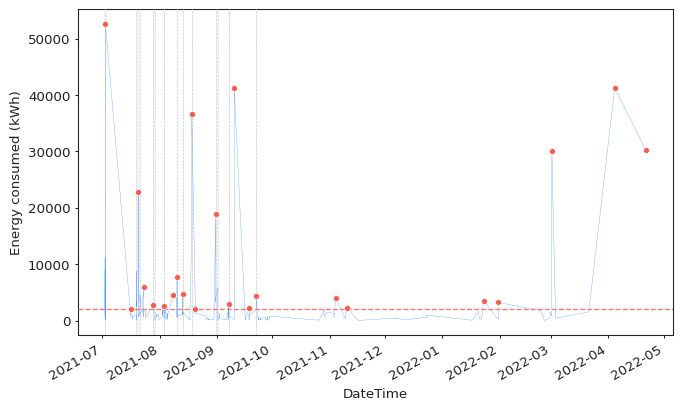

In [1210]:
# model.plot_extremes()
model.plot_extremes(show_clusters=True)


In [1211]:
# model.fit_model()

# Fit a model to the identified extremes
model.fit_model(distribution="genpareto")  # or "exponential", depending on your data and preference


In [1212]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)

In [1213]:
print(summary)


               return value      lower ci      upper ci
return period                                          
1.0            2.056261e+05  43178.157903  2.170579e+06
2.0            5.649934e+05  51738.590005  1.428310e+07
5.0            2.152404e+06  53027.969988  1.728251e+08
10.0           5.922320e+06  54123.286785  1.139335e+09
25.0           2.257494e+07  54890.566303  1.373675e+10
50.0           6.212297e+07  55090.362497  9.032481e+10
100.0          1.709550e+08  55212.953623  5.939253e+11
250.0          6.516918e+08  55305.567241  7.608189e+12
500.0          1.793386e+09  55345.432048  5.505056e+13
1000.0         4.935207e+09  55651.513540  3.656583e+14


(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='Energy consumed (kWh)'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='Energy consumed (kWh)', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

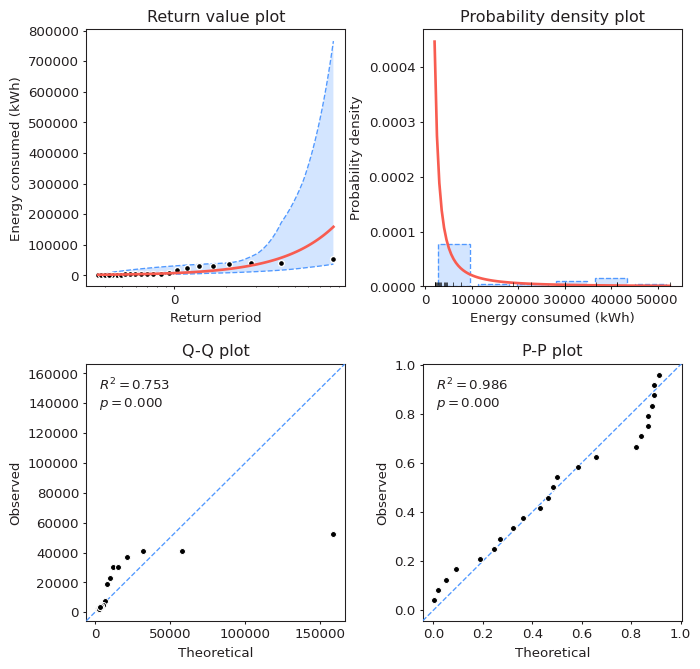

In [1214]:
model.plot_diagnostic(alpha=0.95)

In [1215]:
extremes = model.extremes

# Getting the indices of the extremes
extreme_indices = extremes.index
extreme_values = extremes.values

# Print or process the indices as needed
# print(extreme_indices)
print(extreme_indices.value_counts())
print(extreme_values)


DateTime
2021-07-02 13:48:00    1
2021-09-07 08:48:00    1
2022-04-04 08:00:00    1
2022-03-01 08:06:00    1
2022-01-31 08:06:00    1
2022-01-23 08:00:00    1
2021-11-10 08:00:00    1
2021-11-04 08:00:00    1
2021-09-22 08:12:00    1
2021-09-18 08:00:00    1
2021-09-10 08:06:00    1
2021-08-31 08:00:00    1
2021-07-16 08:06:00    1
2021-08-20 08:06:00    1
2021-08-18 08:06:00    1
2021-08-13 08:06:00    1
2021-08-10 08:24:00    1
2021-08-08 08:00:00    1
2021-08-03 08:00:00    1
2021-07-28 08:00:00    1
2021-07-23 08:00:00    1
2021-07-20 08:42:00    1
2022-04-21 08:00:00    1
Name: count, dtype: int64
[52630.31  2027.67 22820.27  6019.82  2792.84  2563.68  4519.38  7779.59
  4674.21 36705.63  2064.02 18867.47  2919.63 41212.4   2142.11  4306.93
  3967.26  2253.81  3443.75  3196.26 30122.3  41204.52 30160.86]


In [1216]:
print(extreme_indices)

DatetimeIndex(['2021-07-02 13:48:00', '2021-07-16 08:06:00',
               '2021-07-20 08:42:00', '2021-07-23 08:00:00',
               '2021-07-28 08:00:00', '2021-08-03 08:00:00',
               '2021-08-08 08:00:00', '2021-08-10 08:24:00',
               '2021-08-13 08:06:00', '2021-08-18 08:06:00',
               '2021-08-20 08:06:00', '2021-08-31 08:00:00',
               '2021-09-07 08:48:00', '2021-09-10 08:06:00',
               '2021-09-18 08:00:00', '2021-09-22 08:12:00',
               '2021-11-04 08:00:00', '2021-11-10 08:00:00',
               '2022-01-23 08:00:00', '2022-01-31 08:06:00',
               '2022-03-01 08:06:00', '2022-04-04 08:00:00',
               '2022-04-21 08:00:00'],
              dtype='datetime64[ns]', name='DateTime', freq=None)


In [1217]:
dataOriginal= data
# convert DEI Blue Launch (1/7/2021) into DEI Blue Launch (1/7/2021) object and the into index 
# dataOriginal['DEI Blue Launch (1/7/2021)'] = pd.to_datetime(dataOriginal['DEI Blue Launch (1/7/2021)'])
# dataOriginal.set_index('DEI Blue Launch (1/7/2021)', inplace=True)


In [1218]:
# Energy consumed (kWh)
filterOriginal = dataOriginal[dataOriginal['Energy consumed (kWh)'].isin(extreme_values)]



In [1219]:
# Address
print(filterOriginal['Address'])

DateTime
2021-07-02 13:48:00    Ethniki Odos 12o Km Ethnikis Thessalonikis Pereas
2021-07-16 08:06:00                         Nafpliou 39 & OHE & Diotimas
2021-07-20 08:42:00                                       Plateia Nymfon
2021-07-23 08:00:00                   E.O. Kerkyras - Palaiokastritsas 2
2021-07-28 08:00:00                                  Leoforos Chaina 271
2021-08-03 08:00:00                                       Kolokotroni 22
2021-08-08 08:00:00                                          Zefirou 111
2021-08-10 08:24:00                                Leoforos Poseidonos 8
2021-08-13 08:06:00                         Athens International Airport
2021-08-18 08:06:00                         Athens International Airport
2021-08-20 08:06:00                                    Irodotou & Didous
2021-08-31 08:00:00                                          Lazaraki 59
2021-09-07 08:48:00                               Leoforos Kalamakiou 93
2021-09-10 08:06:00                       

In [1220]:
print(filterOriginal.select_dtypes(include=['float64']).describe().round(2))

       Energy consumed (kWh)  Charging Time (h)  Euros (VAT included)  \
count                  23.00              23.00                  23.0   
mean                14278.03            1296.92                   0.0   
std                 16173.50            1255.29                   0.0   
min                  2027.67             231.12                   0.0   
25%                  2856.24             512.36                   0.0   
50%                  4519.38             685.79                   0.0   
75%                 26471.28            1739.28                   0.0   
max                 52630.31            5055.67                   0.0   

       Max Energy Consumed in one session (kWh)  
count                                     23.00  
mean                                      72.19  
std                                       14.97  
min                                       24.85  
25%                                       66.41  
50%                                       

In [1221]:
print(data.describe())

       EVSE Sockets  max P per EVSE (kW)  Unnamed: 8  \
count    318.000000           318.000000  318.000000   
mean       1.522013            22.955975   34.861635   
std        0.500302             6.983844   15.307563   
min        1.000000            22.000000   22.000000   
25%        1.000000            22.000000   22.000000   
50%        2.000000            22.000000   44.000000   
75%        2.000000            22.000000   44.000000   
max        2.000000           120.000000  120.000000   

       Number of Charging Sessions  Energy consumed (kWh)  Charging Time (h)  \
count                   318.000000             318.000000         318.000000   
mean                    196.918239            2462.025000         401.875912   
std                     357.445978            5849.517577         662.149073   
min                       0.000000               0.000000           0.000000   
25%                      29.250000             265.385000          44.145000   
50%            

In [1222]:
filterExcluded = dataOriginal[~dataOriginal['Energy consumed (kWh)'].isin(extreme_values)&
                              (dataOriginal['Energy consumed (kWh)'] <= 2021.38)]


In [1223]:
filterExcluded.select_dtypes(include=['float64']).describe().round(2)

,Energy consumed (kWh),Charging Time (h),Euros (VAT included),Max Energy Consumed in one session (kWh)
count,238.00,238.00,238.0,238.00
mean,666.24,145.28,0.0,50.64
std,554.79,219.72,0.0,18.83
min,0.00,0.00,0.0,1.17
25%,205.65,31.70,0.0,36.12
50%,522.57,83.07,0.0,52.44
75%,1004.10,190.86,0.0,65.89
max,2002.51,2020.09,0.0,93.54


In [1224]:
# filterOriginal.plot()

In [1225]:
filterOriginalFloats = filterOriginal.select_dtypes(include=['float64'])

filterOriginalFloats.corr()
# filterOriginal.iloc[:,:-5].corr()

,Energy consumed (kWh),Charging Time (h),Euros (VAT included),Max Energy Consumed in one session (kWh)
Energy consumed (kWh),1.000000,0.470498,NaN,0.676073
Charging Time (h),0.470498,1.000000,NaN,0.255722
Euros (VAT included),NaN,NaN,NaN,NaN
Max Energy Consumed in one session (kWh),0.676073,0.255722,NaN,1.000000


In [1234]:
filterOriginalFloats.describe().round(2)

,Energy consumed (kWh),Charging Time (h),Euros (VAT included),Max Energy Consumed in one session (kWh)
count,23.00,23.00,23.0,23.00
mean,14278.03,1296.92,0.0,72.19
std,16173.50,1255.29,0.0,14.97
min,2027.67,231.12,0.0,24.85
25%,2856.24,512.36,0.0,66.41
50%,4519.38,685.79,0.0,74.48
75%,26471.28,1739.28,0.0,79.16
max,52630.31,5055.67,0.0,101.12


In [1227]:
dataFloats = data.select_dtypes(include=['float64'])
# dataFloats.corr()
dataFloats.describe()

removeExtremes = dataFloats-filterOriginalFloats

In [1228]:

removeExtremes.describe()

,Energy consumed (kWh),Charging Time (h),Euros (VAT included),Max Energy Consumed in one session (kWh)
count,23.0,23.0,23.0,23.0
mean,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0


In [1229]:
removeExtremes.describe()

,Energy consumed (kWh),Charging Time (h),Euros (VAT included),Max Energy Consumed in one session (kWh)
count,23.0,23.0,23.0,23.0
mean,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0


In [1230]:
compare2 = filterOriginalFloats.corr()- dataFloats.corr()

In [1231]:
print(compare2)

                                          Energy consumed (kWh)  \
Energy consumed (kWh)                                  0.000000   
Charging Time (h)                                     -0.165788   
Euros (VAT included)                                        NaN   
Max Energy Consumed in one session (kWh)               0.273170   

                                          Charging Time (h)  \
Energy consumed (kWh)                             -0.165788   
Charging Time (h)                                  0.000000   
Euros (VAT included)                                    NaN   
Max Energy Consumed in one session (kWh)          -0.159918   

                                          Euros (VAT included)  \
Energy consumed (kWh)                                      NaN   
Charging Time (h)                                          NaN   
Euros (VAT included)                                       NaN   
Max Energy Consumed in one session (kWh)                   NaN   

                 

In [1232]:
# from sklearn.metrics.pairwise import cosine_similarity

# similarity = cosine_similarity(filterOriginal.iloc[:,:-5], data.iloc[:,:-5])   

In [1233]:
# print(similarity)